In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [4]:
def plot_confusion_matrix(y,y_pred):
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y,y_pred)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax)
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['landing failed','landing successful'])
    ax.yaxis.set_ticklabels(['landing failed','landing successful'])
    plt.show()

In [5]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [6]:
X = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv')
X.head()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [7]:
Y = df.Class.to_numpy()

In [9]:
scaler = preprocessing.StandardScaler()

In [10]:
X = scaler.fit_transform(X)

In [11]:
x_train,x_test, y_train,y_test = train_test_split(X,Y,train_size=0.8,random_state=2)

In [12]:
y_test.shape

(18,)

#### Logistic Regression

In [14]:
parameters = {'C':[0.01,0.1,1],
              'penalty':['l2'],
              'solver':['lbfgs']
             }
lr = LogisticRegression()

In [15]:
logreg_cv = GridSearchCV(lr,parameters,cv=10)
logreg_cv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [16]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8464285714285713


In [18]:
logreg_cv.score(x_test,y_test)

0.8333333333333334

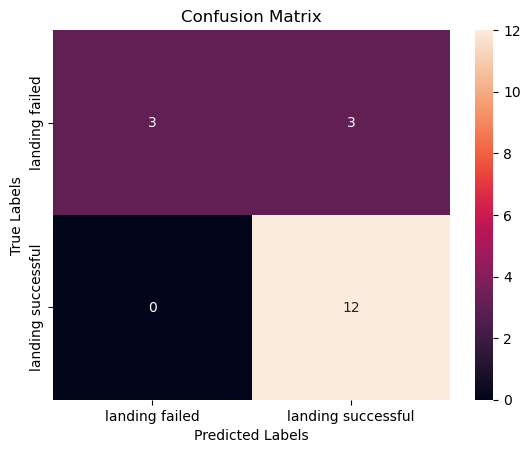

In [19]:
yhat = logreg_cv.predict(x_test)
plot_confusion_matrix(y_test,yhat)

#### Support Vector Machine

In [23]:
parameters = {
    'kernel':('linear','rbf','poly','rbf','sigmoid'),
    'C':np.logspace(-3,3,5),
    'gamma':np.logspace(-3,3,5)}
svm = SVC()

In [24]:
svm_cv = GridSearchCV(svm,parameters,cv=10)
svm_cv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [25]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856


In [26]:
svm_cv.score(x_test,y_test)

0.8333333333333334

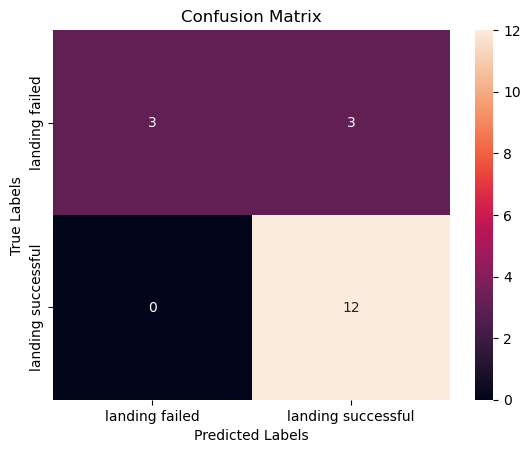

In [28]:
yhat=svm_cv.predict(x_test)
plot_confusion_matrix(y_test,yhat)

#### Decision Tree Classifier

In [32]:
parameters = {
    'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'max_depth':[2*n for n in range(1,10)],
    'max_features':['sqrt'],
    'min_samples_leaf':[1,2,4],
    'min_samples_split':[2,5,10],
}
tree = DecisionTreeClassifier()

In [33]:
tree_cv = GridSearchCV(tree, parameters, cv=10)
tree_cv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [34]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 14, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'random'}
accuracy : 0.9017857142857144


In [35]:
tree_cv.score(x_test,y_test)

0.7222222222222222

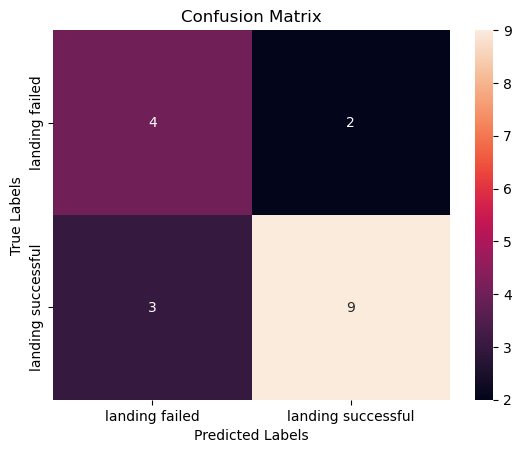

In [36]:
yhat = tree_cv.predict(x_test)
plot_confusion_matrix(y_test,yhat)

#### KNN Classifier

In [42]:
parameters = {
    'n_neighbors':range(1,11),
    'algorithm':['auto','ball_tree','kd_tree','brute'],
    'p':[1,2],
}
KNN = KNeighborsClassifier()

In [43]:
knn_cv = GridSearchCV(KNN, parameters, cv=10)
knn_cv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': range(1, 11), 'p': [1, 2]})

In [45]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858


In [44]:
knn_cv.score(x_test,y_test)

0.8333333333333334

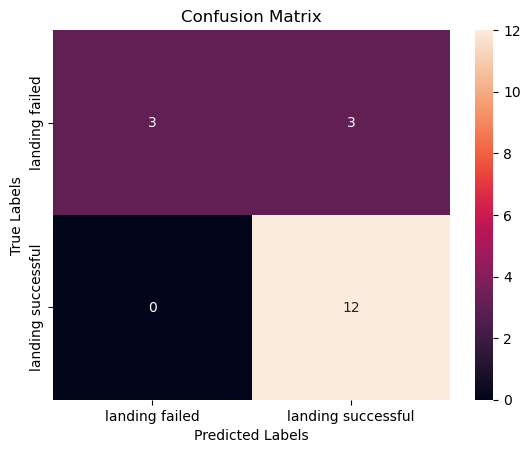

In [47]:
yhat = knn_cv.predict(x_test)
plot_confusion_matrix(y_test,yhat)

In [49]:
print("LOGISTIC REGRESSION\n Validation Score: ",logreg_cv.best_score_," Testing Score: ",logreg_cv.score(x_test,y_test))
print("\n\nSUPPORT VECTOR\n CLASSIFIER Validation Score: ",svm_cv.best_score_," Testing Score: ",svm_cv.score(x_test,y_test))
print("\n\nDECISION TREE\n Validation Score: ",tree_cv.best_score_," Testing Score: ",tree_cv.score(x_test,y_test))
print("\n\nKNEAREST NEIGHBORS\n Validation Score: ",knn_cv.best_score_," Testing Score: ",knn_cv.score(x_test,y_test))


LOGISTIC REGRESSION
 Validation Score:  0.8464285714285713  Testing Score:  0.8333333333333334


SUPPORT VECTOR
 CLASSIFIER Validation Score:  0.8482142857142856  Testing Score:  0.8333333333333334


DECISION TREE
 Validation Score:  0.9017857142857144  Testing Score:  0.7222222222222222


KNEAREST NEIGHBORS
 Validation Score:  0.8482142857142858  Testing Score:  0.8333333333333334
